<a href="https://colab.research.google.com/github/AvHai/AvhishekNandi_09_AIML_Lab_Assignment/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
from collections import deque

In [12]:
sys.setrecursionlimit(10000)

In [13]:
def bfs_shortest_path(graph, start, goal):
    # Initialize the queue with the start node and the path to it
    queue = deque([(start, [start])])
    visited = set()


    while queue:
        (vertex, path) = queue.popleft()
        if vertex in visited:
            continue


        for neighbor in graph.neighbors(vertex):
            if neighbor == goal:
                return path + [neighbor]
            else:
                queue.append((neighbor, path + [neighbor]))


        visited.add(vertex)
    return None



In [14]:
def iterative_dfs(graph, start):
    visited = set()
    stack = [(start, [start])]


    while stack:
        (vertex, path) = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            for neighbor in reversed(list(graph.neighbors(vertex))):
                stack.append((neighbor, path + [neighbor]))


    return path

In [15]:
def visualize_graph(graph, path, title):
    pos = nx.spring_layout(graph)  # Position nodes using Fruchterman-Reingold force-directed algorithm


    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)


    # Highlight the path
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='orange')
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)


    plt.title(title)
    plt.show()


In [16]:
G = nx.read_edgelist('facebook_combined.txt')


# Basic graph information
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
is_directed = G.is_directed()
density = nx.density(G)


print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Is the graph directed:", is_directed)
print("Graph density:", density)


start_node = '12'
goal_node = '76'





Number of nodes: 4039
Number of edges: 88234
Is the graph directed: False
Graph density: 0.010819963503439287


Shortest path from 12 to 76 using BFS: ['12', '0', '76']
DFS exploration starting from 12 :
12 -> 0 -> 347


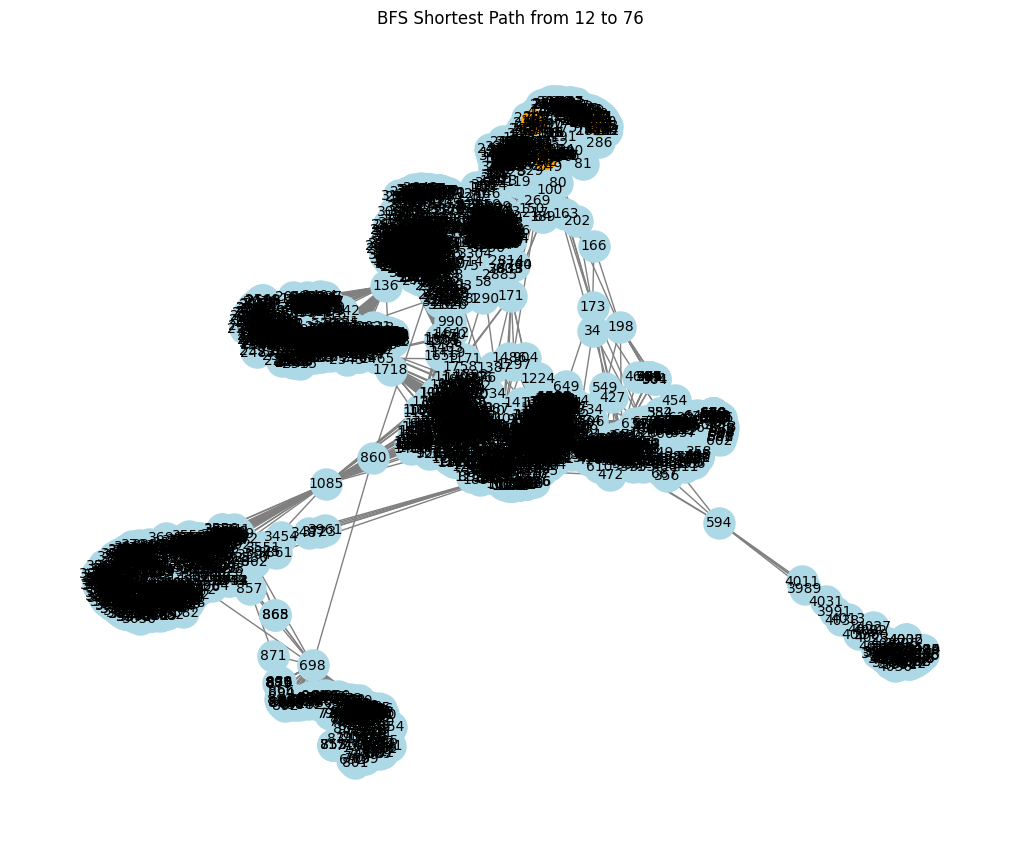

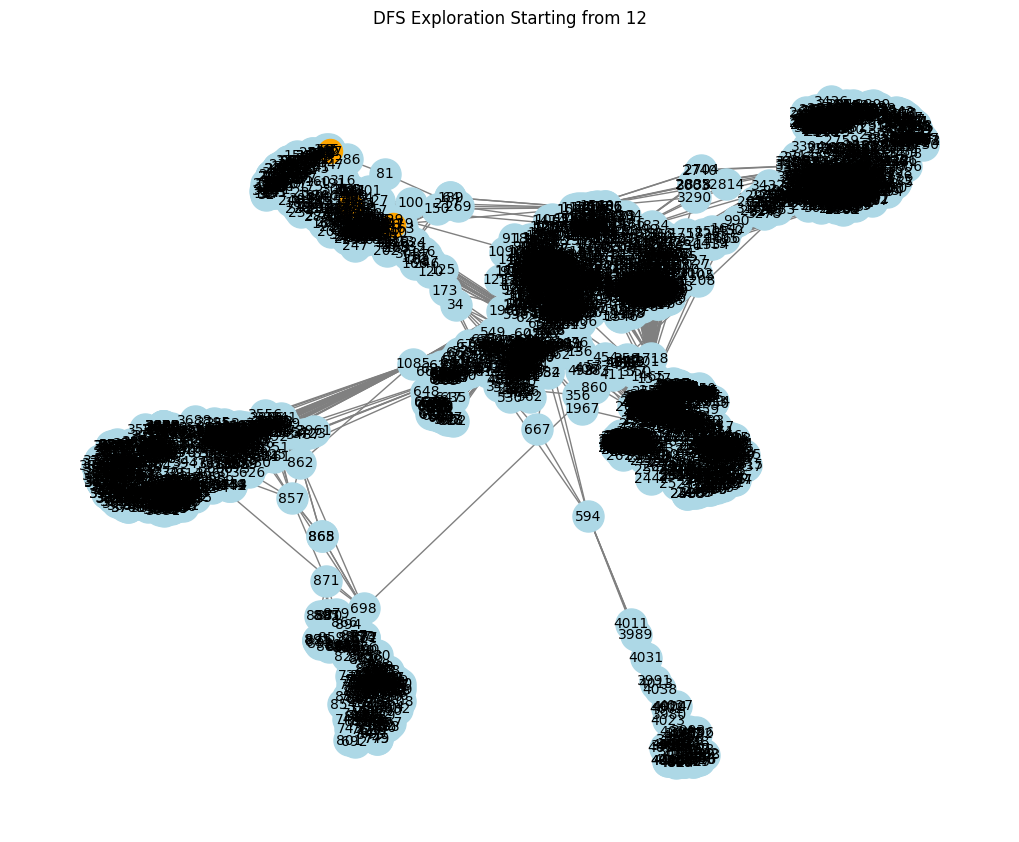

In [17]:
if start_node not in G or goal_node not in G:
    raise ValueError("Start or goal node not in graph")

bfs_path = bfs_shortest_path(G, start_node, goal_node)
print(f"Shortest path from {start_node} to {goal_node} using BFS:", bfs_path)



dfs_path = iterative_dfs(G, start_node)
print("DFS exploration starting from", start_node, ":")
print(" -> ".join(dfs_path))



if bfs_path:
    visualize_graph(G, bfs_path, f"BFS Shortest Path from {start_node} to {goal_node}")

visualize_graph(G, dfs_path, f"DFS Exploration Starting from {start_node}")



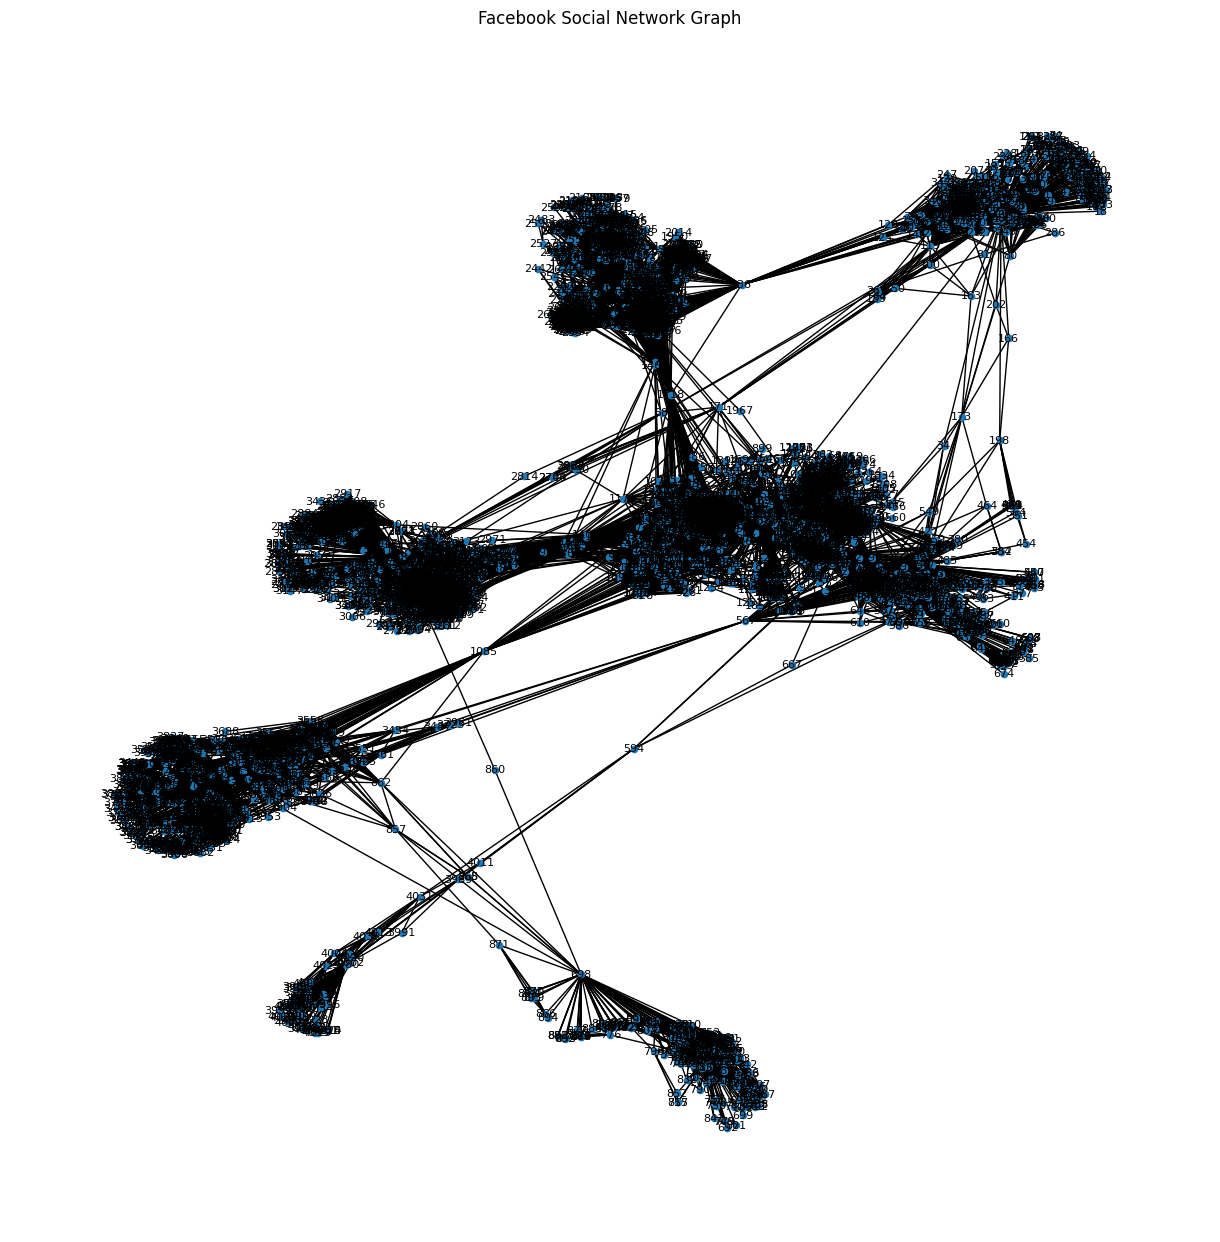

In [18]:
pos = nx.spring_layout(G)

plt.figure(figsize=(12,12))
nx.draw(G, pos, with_labels=True, node_size=20, font_size=8)
plt.title("Facebook Social Network Graph")
plt.show()
